<img src="https://drive.google.com/uc?export=view&id=15W0WXOWOd3gp67glg94sQHr_cIzLMzze">

<h1>Lesson 8 - 機器學習體驗</h1>

MIT License. Copyright (c) 2020 LisaTsai in CAVEDU

## 課程大綱

+ #### 使用Keras進行MNIST手寫數字辨識
+ #### 使用PyTorch訓練自己的影像辨識模型
    + 準備影像資料並分類
    + 訓練自己的辨識模型
    + 應用辨識模型
+ #### 使用Google Teachable Machine線上辨識


<img src="https://drive.google.com/uc?export=view&id=1ZmYJYk8chkzYlooKt4_RUeDa6PXaj0w-">
<img src="https://drive.google.com/uc?export=view&id=1EQfS_eKAW00Mxwv9tr5K7uvxLvLH1RMN">

==============

### 使用Keras進行MNIST手寫數字辨識

Keras 參考網站 :  
https://keras.io

MNIST手寫數字辨識影像檔案：   
https://scidm.nchc.org.tw/dataset/mnist

### Step 0. 安裝TensorFlow跟Keras

In [2]:
import sys
try:
    import keras
    v = keras.__version__
    v_list=v.split('.')
    print("你的 keras 版本為 "+v)
    if int(v[0])<2:
        !{sys.executable} -m pip install --upgrade keras 
except:
    !{sys.executable} -m pip install tensorflow==1.14.0 keras

你的 keras 版本為 2.3.0


### Step 1. 檢查keras版本

In [3]:
import keras
keras.__version__

'2.3.0'

### Step 2. 手寫數字辨識-載入 MNIST 資料集

In [44]:
from keras.datasets import mnist  

#載入訓練集跟測試集的影像及標籤
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Step 3. 檢視訓練集資料

In [5]:
#有 60000 張圖，每張大小是 28x28
train_images.shape 

(60000, 28, 28)

In [6]:
#標籤有 60000 個
len(train_labels)

60000

In [7]:
#標籤是 0-9 之間的數字, 資料類型為 uint8
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Step 4. 檢視測試集資料

In [8]:
#有 10000 張圖，每張大小是 28x28
test_images.shape 

(10000, 28, 28)

In [9]:
#標籤有 10000 個
len(test_labels)

10000

In [10]:
#標籤是 0-9 之間的數字, 資料類型為 uint8
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Step 5. 顯示資料集中的任一影像

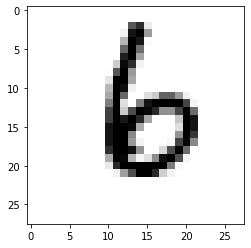

In [54]:
import matplotlib.pyplot as plt

#讀取index為2020的影像
digit = train_images[2020]

#指定要顯示的影像
plt.imshow(digit, cmap=plt.cm.binary)

#顯示影像
plt.show()

### 顯示資料集中的50張影像 (複習Lesson7中的組圖)

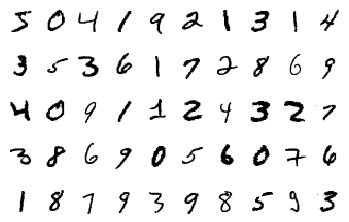

In [25]:
import matplotlib.pyplot as plt

#共有5列10行
for i in range(5):
    for j in range(10):
        
        #設定第i列第j行的影像
        plt.subplot(5,10,i*10+j+1) 
    
        #讀取index為i*10+j的影像
        digit = train_images[i*10+j]

        #將座標軸取消
        plt.axis('off')  
        
        #指定要顯示的影像
        plt.imshow(digit, cmap=plt.cm.binary)
        
#顯示影像
plt.show()

### Step 6. 開始寫訓練程式-建立神經網路架構

In [26]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

### Step 7. 編譯神經網路

In [29]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Step 8. 影像資料前處理

<img src="https://drive.google.com/uc?export=view&id=1uK8H2JDCfrjfoILoR0SAMQMwrHMN_jFw">


In [45]:
#處理訓練用資料，影像資料從二維陣列變為一維陣列
train_images_new = train_images.reshape((60000, 28 * 28)) 
train_images_new = train_images_new.astype('float32') / 255

#處理測試用資料，影像資料從二維陣列變為一維陣列
test_images_new = test_images.reshape((10000, 28 * 28))
test_images_new = test_images_new.astype('float32') / 255

### Step 9. 準備標籤

In [30]:
from keras.utils import to_categorical

#訓練資料標籤
train_labels = to_categorical(train_labels)
#測試資料標籤
test_labels = to_categorical(test_labels)

### Step 10. 訓練神經網路模型

In [32]:
network.fit(train_images_new, 
            train_labels, 
            epochs=5, 
            batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.0356 - accuracy: 0.9894
Epoch 2/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.0271 - accuracy: 0.9920
Epoch 3/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.0207 - accuracy: 0.9941
Epoch 4/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0163 - accuracy: 0.9953
Epoch 5/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.0129 - accuracy: 0.9964


### Step 11. 用測試資料評估模型表現

In [33]:
#將預測結果跟實際的測試資料標籤做比對
test_loss, test_acc = network.evaluate(test_images_new, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 42us/step
test_acc: 0.9804999828338623


### Step 12. 檢視手寫圖片辨識結果

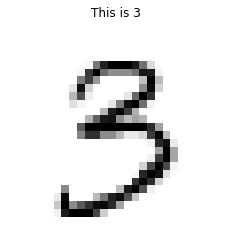

In [53]:
import matplotlib.pyplot as plt

#預測測試影像集
prediction = network.predict_classes(test_images_new)

#檢視index為2020的影像
digit = test_images[2020]

#將座標軸取消
plt.axis('off')  
        
#指定要顯示的影像
plt.imshow(digit, cmap=plt.cm.binary)
        
plt.title("This is "+str(prediction[2020]))
#顯示影像
plt.show()

### 檢視五十個測試資料集中手寫數字的辨識結果

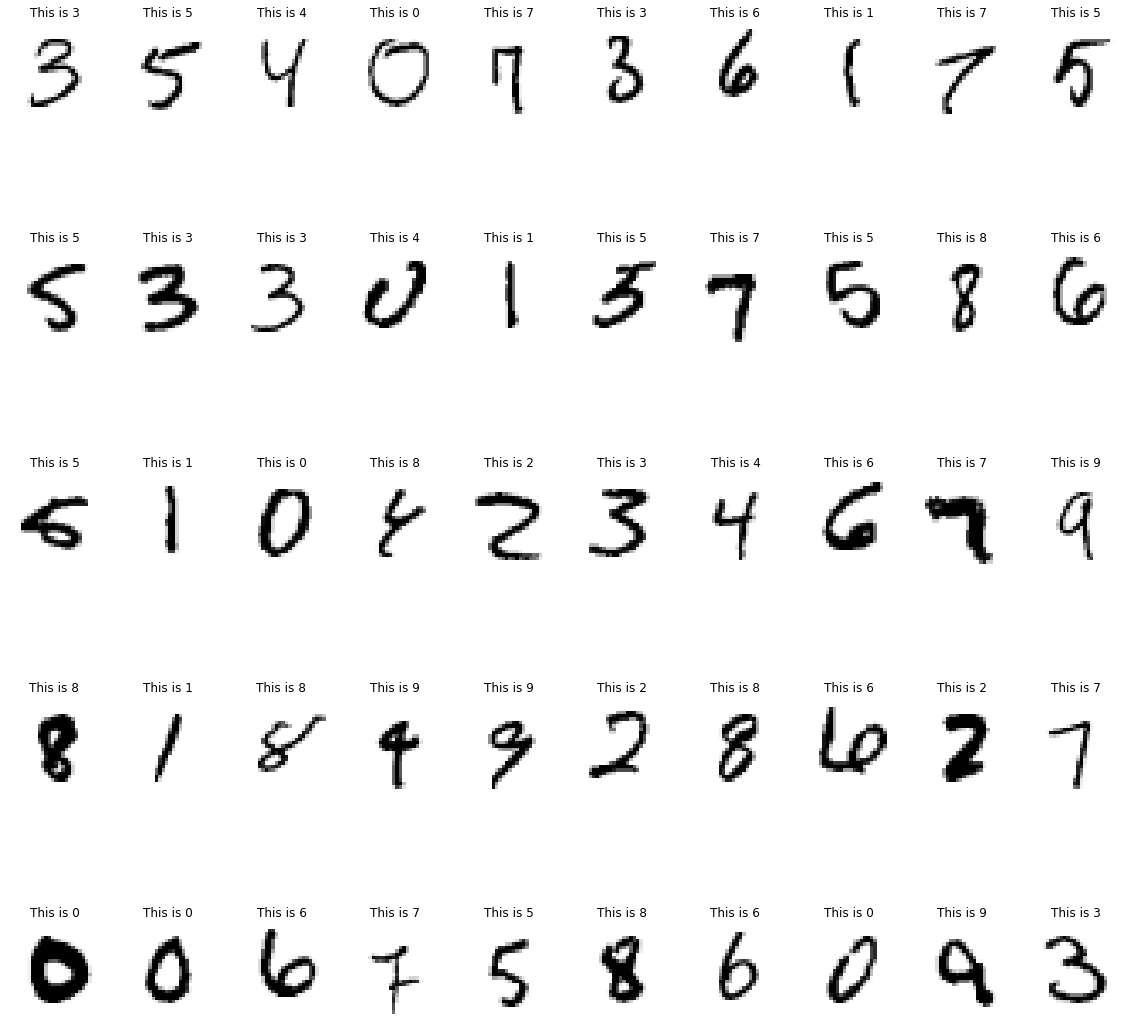

In [55]:
import matplotlib.pyplot as plt

#預測測試影像集
prediction = network.predict_classes(test_images_new)

#print(prediction)

plt.figure(figsize = (20,20))
#顯示五十個測試資料集中手寫數字的辨識結果
for i in range(5):
    for j in range(10):
        
        #設定第i列第j行的影像
        plt.subplot(5,10,i*10+j+1) 
    
        #讀取index為i*10+j+2020的影像
        digit = test_images[i*10+j+2020]

        #將座標軸取消
        plt.axis('off')  
        
        #指定要顯示的影像
        plt.imshow(digit, cmap=plt.cm.binary)
        
        plt.title("This is "+str(prediction[i*10+j+2020]))
#顯示影像
plt.show()

## 使用PyTorch訓練自己的影像辨識模型  

+ A. 準備影像資料並分類
+ B. 訓練自己的辨識模型
+ C. 應用辨識模型

PyTorch : https://pytorch.org

## A. 準備影像資料並分類

### Step 1. 安裝google_images_download（複習Lesson6圖片下載）

In [1]:
import sys
!{sys.executable} -m pip install google_images_download

### Step 2. 下載要分類用的兩種圖片（範例中為貓、狗）

In [2]:
from google_images_download import google_images_download  

response = google_images_download.googleimagesdownload() 

#設定參數：關鍵字、幾張圖、是否顯示圖片連結
arguments = {"keywords":"cat,dog","limit":100,"print_urls":True}

#執行下載
paths = response.download(arguments)

#print(paths)


Item no.: 1 --> Item name = cat
Evaluating...
Starting Download...
Image URL: https://www.sciencealert.com/images/2019-12/processed/CatsHaveFacialExpressionsButHardToRead_600.jpg
Completed Image ====> 1.CatsHaveFacialExpressionsButHardToRead_600.jpg
Image URL: https://icatcare.org/app/uploads/2018/07/Thinking-of-getting-a-cat.png
Completed Image ====> 2.Thinking-of-getting-a-cat.png
Image URL: https://img.huffingtonpost.com/asset/5dcc613f1f00009304dee539.jpeg?cache=QaTFuOj2IM&ops=crop_834_777_4651_2994%2Cscalefit_720_noupscale
Completed Image ====> 3.5dcc613f1f00009304dee539.jpeg
Image URL: https://api.time.com/wp-content/uploads/2019/12/CatFilterReaction.jpg?w=600&quality=85
Completed Image ====> 4.CatFilterReaction.jpg
Image URL: https://i.ytimg.com/vi/pjRs_WT8VzM/maxresdefault.jpg
Completed Image ====> 5.maxresdefault.jpg

Errors: 0


Item no.: 2 --> Item name = dog
Evaluating...
Starting Download...
Image URL: https://i.ytimg.com/vi/MPV2METPeJU/maxresdefault.jpg
Completed Image ==

### Step 3. 安裝OpenCV並整理圖片

In [ ]:
import sys
!{sys.executable} -m pip install opencv-python

In [3]:
import os
import cv2

#指定路徑
source_path = "downloads"

#建立儲存圖片檔案名稱的空清單
#files=[]

#檢視資料夾下所有的檔案
for r,d,f in os.walk(source_path):
    for file in f:
        #將檔案名稱跟路徑合併
        filename = os.path.join(r,file)
        #將檔案路徑加到清單中
        #files.append(os.path.join(r,file))
        try:
            #讀取圖片
            pic = cv2.imread(filename)
            #將圖片大小改為224x224
            pic = cv2.resize(pic, (224, 224), interpolation=cv2.INTER_CUBIC)
            #重新儲存圖片
            cv2.imwrite(filename,pic)
        except:
            pass
#print(files)

### B. 訓練自己的辨識模型

### Step 4. 安裝PyTorch

In [4]:
import sys
!{sys.executable} -m pip install torch==1.2.0 torchvision==0.4.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


### Step 5. 檢查PyTorch版本

In [5]:
import torch
print(torch.__version__)

1.2.0


### Step 6. 匯入函式庫

In [6]:
import torch
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

### Step 7. 讀取影像檔案做初步處理

In [8]:
dataset = datasets.ImageFolder(
    'downloads',
    transforms.Compose([
        #調整明亮度、對比度、飽和度、色調
        transforms.ColorJitter(0.1, 0.1, 0.1, 0.1),
        #將圖片大小改為224x224
        transforms.Resize((224, 224)),
        #將圖片資料轉成張量
        transforms.ToTensor(),
        #將數據標準化，通道分別為h,w,c，第一組為平均值，第二組為標準差
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
)

### Step 8. 將影像資料分成訓練資料集跟測試資料集

In [12]:
#定義訓練資料集所佔的比例
ratio = 0.8
#計算訓練資料集的圖片數量
train_number = int(ratio*len(dataset))
#計算測試資料集的圖片數量
test_number = len(dataset)-train_number
#將圖片按照圖片數量隨機分配到兩組資料集中
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_number ,test_number])

print("訓練資料集中有"+str(train_number)+"張圖片")
print("測試資料集中有"+str(test_number)+"張圖片")

訓練資料集中有133張圖片
測試資料集中有34張圖片


### Step 9. 設定訓練跟測試模型時的參數
+ torch.utils.data.DataLoader(使用的資料集,batch_size=每一次訓練的樣本數目,shuffle=是否打亂數據,num_workers=要同時開幾條工作線來讀數據)
+ 適量的提高batch_size可以減少單次epoch的迭代次數(iteration=樣本總數/batchsize)，且梯度下降方向明確，可以減少訓練過程中的震盪，但同時epoch也需要增加以確保最好的效果
+ 如果樣本總數無法整除batch_size，最後一組就是剩下的數據，不會補齊
+ shuffle設置為True，打亂數據比較好，讓每一個epoch的批量圖片都不同

In [14]:
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=16,
    shuffle=True,
    num_workers=4
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=16,
    shuffle=True,
    num_workers=4
)

### Step 10. 使用Alexnet做分類用的網路模型


對CNN（卷積神經網路）有興趣的人可以參考：  

https://medium.com/@WhoYoung99/alexnet-架構概述-988113c06b4b  
https://medium.com/雞雞與兔兔的工程世界/機器學習-ml-note-cnn演化史-alexnet-vgg-inception-resnet-keras-coding-668f74879306

In [13]:
#使用Alexnet並匯入已訓練好的權重
model = models.alexnet(pretrained=True)

### Step 11. 將Alexnet的輸出結果改為分兩類

In [15]:
model.classifier[6] = torch.nn.Linear(model.classifier[6].in_features, 2)

### Step 12. 開始訓練辨識圖片的模型

對最佳化的不同方式可以參考：  

https://medium.com/雞雞與兔兔的工程世界/機器學習ml-note-sgd-momentum-adagrad-adam-optimizer-f20568c968db

<img src="https://drive.google.com/uc?export=view&id=1C8rNxoSoqXFy03g8qT-crPgcqLB3tkXL">


In [16]:
#定義要更新權重幾次
NUM_EPOCHS = 10
#定義模型儲存的名稱及路徑
BEST_MODEL_PATH = 'best_model.pth'
#定義最佳準確率的值，預設為0.0
best_accuracy = 0.0

#定義最佳化的方式，這邊使用SGD(準確率梯度下降法)，學習速率為0.001，動量為0.9 

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#定義每一個epoch
for epoch in range(NUM_EPOCHS):
    
    #更新模型權重，使其最佳化
    for images, labels in iter(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
    
    #定義test_error_count紀錄訓練資料辨識錯誤的個數
    test_error_count = 0.0
    
    #用模型辨識測試資料集中的圖片，並計算辨識結果跟標籤結果不同的情況
    for images, labels in iter(test_loader):
        outputs = model(images)
        test_error_count += float(torch.sum(torch.abs(labels - outputs.argmax(1))))
    
    #計算測試資料集的辨識準確率
    test_accuracy = 1.0 - float(test_error_count) / float(len(test_dataset))
    print('第%d個epoch的測試準確率: %f' % (epoch, test_accuracy))
    
    #如果這一個epoch的測試準確率大於目前紀錄的最佳準確率，將模型儲存，並更新最佳準確率
    if test_accuracy > best_accuracy:
        torch.save(model.state_dict(), BEST_MODEL_PATH)
        best_accuracy = test_accuracy

第0個epoch的測試準確率: 0.941176
第1個epoch的測試準確率: 0.882353
第2個epoch的測試準確率: 0.911765
第3個epoch的測試準確率: 0.882353
第4個epoch的測試準確率: 0.882353
第5個epoch的測試準確率: 0.911765
第6個epoch的測試準確率: 0.882353
第7個epoch的測試準確率: 0.911765
第8個epoch的測試準確率: 0.911765
第9個epoch的測試準確率: 0.882353


### C. 應用辨識模型-辨識新圖片

### Step 13. 匯入函式庫並選用Alexnet做模型

In [2]:
import torch
import torchvision

model = torchvision.models.alexnet(pretrained=False)
model.classifier[6] = torch.nn.Linear(model.classifier[6].in_features, 2)

### Step 14. 使用訓練好的權重

In [3]:
model.load_state_dict(torch.load('best_model.pth'))

<All keys matched successfully>

### Step 15. 定義圖片的前處理函式

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#定義圖片的平均值及標準差
mean = 255.0 * np.array([0.485, 0.456, 0.406])
stdev = 255.0 * np.array([0.229, 0.224, 0.225])

#將圖片正規化
normalize = torchvision.transforms.Normalize(mean, stdev)

#前處理函式
def preprocess(new_image):
    global device, normalize
    x = new_image
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    x = x.transpose((2, 0, 1))
    x = torch.from_numpy(x).float()
    x = normalize(x)
    x = x[None, ...]
    return x

### Step 16. 讀取圖片並顯示辨識結果
+ 也可以用其他照片試試看唷！

The probabily of cat is 0.745
The probabily of dog is 0.255


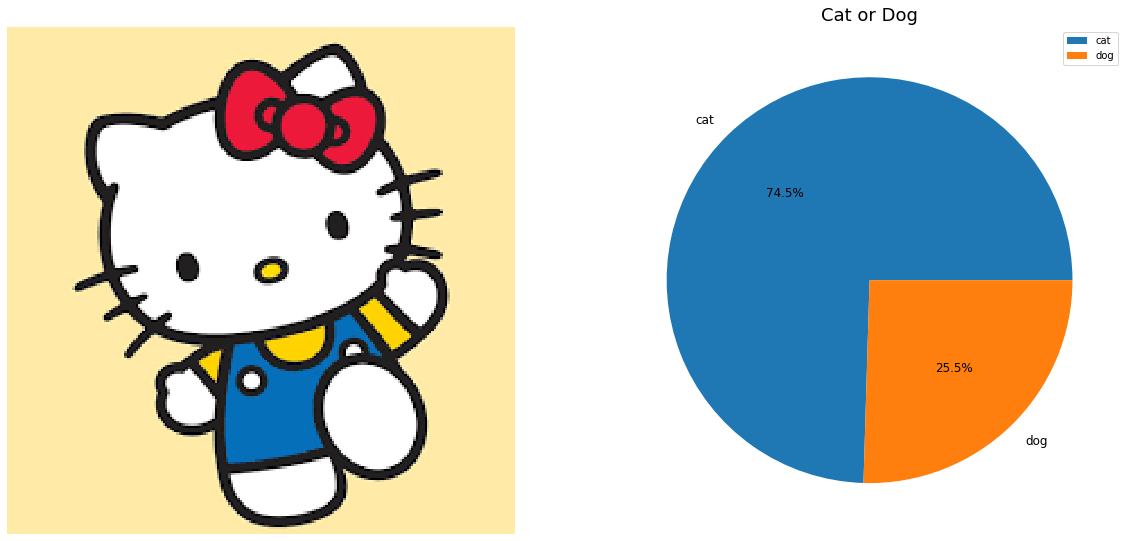

In [14]:
##### 辨識HelloKitty

#讀取圖片
pic = cv2.imread("HelloKitty.png")
#改變圖片大小為224x224
pic_new = cv2.resize(pic, (224, 224), interpolation=cv2.INTER_CUBIC)
#圖片前處理
pic_new=preprocess(pic_new)

#將模型套用在圖片上
y = model(pic_new)
#整理模型輸出結果
y = F.softmax(y, dim=1)
#print(y)
#取得模型辨識是貓的可能性
prob_cat = float(y.flatten()[0])
#取得模型辨識是狗的可能性
prob_dog = float(y.flatten()[1])

print("The probabily of cat is "+str(round(prob_cat,3)))
print("The probabily of dog is "+str(round(prob_dog,3)))


# 設定顯示圖框架大小
plt.figure(figsize=(20,10)) 
#顯示圖片
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(pic, cv2.COLOR_BGR2RGB))
plt.axis("off")

#複習Lesson5圓餅圖

# 類別標籤
labels = ["cat","dog"]

# 數值，同樣不要「統計」類
size = [prob_cat,prob_dog]
plt.subplot(1,2,2)
# 設定圓餅圖細節
plt.pie(size,                           # 數值
        labels = labels,  # 標籤
        autopct = "%0.1f%%",            # 將數值取到小數點一位
        textprops = {"fontsize" : 12},  # 文字大小
       ) 

# 設定標題及其文字大小
plt.title("Cat or Dog", {"fontsize" : 18})

# 設定圖例放在最好的位置
plt.legend(loc = "best")   

plt.show()



The probabily of cat is 0.063
The probabily of dog is 0.937


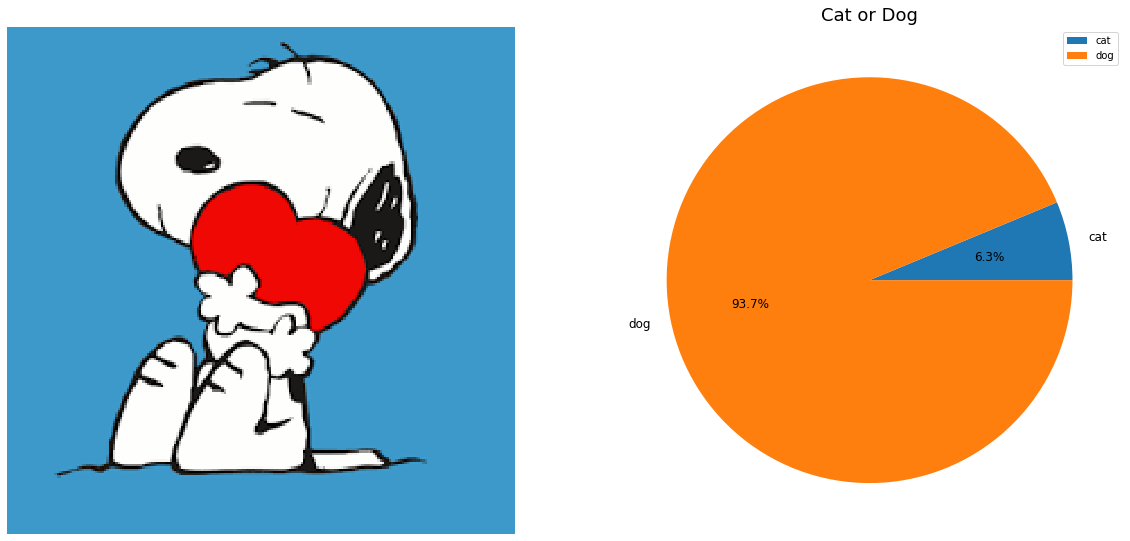

In [15]:
##### 辨識Snoopy

#讀取圖片
pic = cv2.imread("Snoopy.png")
#改變圖片大小為224x224
pic_new = cv2.resize(pic, (224, 224), interpolation=cv2.INTER_CUBIC)
#圖片前處理
pic_new=preprocess(pic_new)

#將模型套用在圖片上
y = model(pic_new)
#整理模型輸出結果
y = F.softmax(y, dim=1)
#print(y)
#取得模型辨識是貓的可能性
prob_cat = float(y.flatten()[0])
#取得模型辨識是狗的可能性
prob_dog = float(y.flatten()[1])

print("The probabily of cat is "+str(round(prob_cat,3)))
print("The probabily of dog is "+str(round(prob_dog,3)))


# 設定顯示圖框架大小
plt.figure(figsize=(20,10)) 
#顯示圖片
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(pic, cv2.COLOR_BGR2RGB))
plt.axis("off")

#複習Lesson5圓餅圖

# 類別標籤
labels = ["cat","dog"]

# 數值，同樣不要「統計」類
size = [prob_cat,prob_dog]
plt.subplot(1,2,2)
# 設定圓餅圖細節
plt.pie(size,                           # 數值
        labels = labels,  # 標籤
        autopct = "%0.1f%%",            # 將數值取到小數點一位
        textprops = {"fontsize" : 12},  # 文字大小
       ) 

# 設定標題及其文字大小
plt.title("Cat or Dog", {"fontsize" : 18})

# 設定圖例放在最好的位置
plt.legend(loc = "best")   

plt.show()



### 使用Google Teachable Machine線上辨識

https://teachablemachine.withgoogle.com

<img src="https://drive.google.com/uc?export=view&id=17zicUs0D0Hyhc076wvippTiXTQinm8vT">
<img src="https://drive.google.com/uc?export=view&id=1N7_WlkOXrEpiEfbLcTTt_7NOppRUtSIA">
<img src="https://drive.google.com/uc?export=view&id=1iA46gf-yo4EQpckzF36iKm_Bycc-flUG">
<img src="https://drive.google.com/uc?export=view&id=1UkxJqChCF25PbMrzz2Viu-p6T3ccOnjv">
<img src="https://drive.google.com/uc?export=view&id=1_38IbNROfjeIbwFay6_271I9rcNoG10_">
<img src="https://drive.google.com/uc?export=view&id=18LzuF8mxvpeAdZ_2hG4KTRw1NoWXUXRs">

## 補充資料

### 推薦書籍：

+ 精通 Python：運用簡單的套件進行現代運算
https://www.books.com.tw/products/0010690075?utm_source=s89277123&utm_medium=ap-books&utm_content=recommend&utm_campaign=ap-201908

+ 深入淺出Python（第二版）（很多圖）
https://www.books.com.tw/products/0010810787?utm_source=s89277123&utm_medium=ap-books&utm_content=recommend&utm_campaign=ap-201908

+ Deep learning 深度學習必讀 - Keras 大神帶你用 Python 實作 (Deep Learning with Python) 
https://www.tenlong.com.tw/products/9789863125501

### Python自學資源
+ 超過200題的線上Python練習題 （英文）：https://snakify.org/en/
+ 從遊戲中學Python(英文)：https://codecombat.com
+ Python進階(英文，有需付費項目)：  
包含課程有 資料分析、金融數據、聊天機器人、機器學習、資料視覺化等
https://www.codecademy.com/catalog/language/python

### 進階學習
+ 與使用者互動的人機介面-QtCreator、PyQt
https://www.qt.io/product